# 220455224 QUESTION 1 

Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a)

Set up the initial values

In [2]:
x0 = 0 
N = 10000
s = 1

Define the Metropolis-Hastings algorithm 

In [3]:
def metropolis_hastings(initial_value, iterations, std_dev):
    samples = np.zeros(iterations)
    current_value = initial_value
    
    for i in range(iterations):
        x_asterisk = np.random.normal(current_value, std_dev)
        
        log_ratio = -np.abs(x_asterisk) + np.abs(current_value)
        log_u = np.log(np.random.uniform(0, 1))
        
        if log_u < log_ratio:
            current_value = x_asterisk
        
        samples[i] = current_value
    
    return samples

Run the Metropolis-Hastings algorithm

In [4]:
samples = metropolis_hastings(x0, N, s)

Plot histogram and kernel density plot

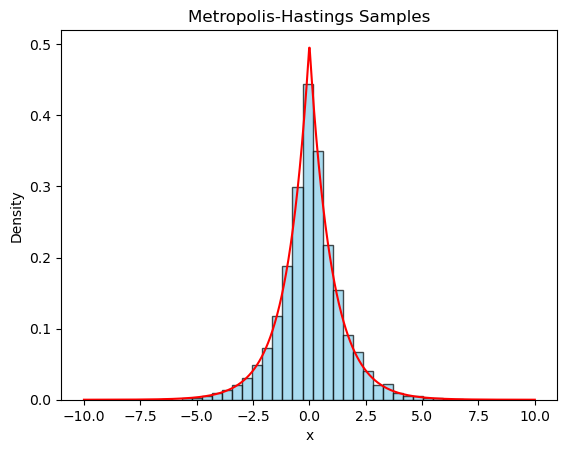

In [5]:
# Plot histogram
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
# Place the title and axis labels
plt.title('Metropolis-Hastings Samples')
plt.xlabel('x')
plt.ylabel('Density')
# Plot kernel density estimate
density = np.linspace(-10, 10, 1000)
plt.plot(density, 0.5 * np.exp(-np.abs(density)), color='red')

plt.show()

Get the sample mean and sample standard deviation

In [6]:
print("Sample Mean:", np.mean(samples))
print("Sample Standard Deviation:", np.std(samples))

Sample Mean: 0.03805295220956331
Sample Standard Deviation: 1.3924329788690482


### b)

Import the relevant packages needed.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Define the Metropolis-Hastings algorithm

In [8]:
def metropolis_hastings(initial_value, iterations, std_dev, j):
    samples = np.zeros(iterations)
    current_value = initial_value

    for i in range(iterations):
        x_star = np.random.normal(current_value, std_dev)
        ratio = np.exp(-(np.abs(x_star)**j)) / np.exp(-(np.abs(current_value)**j))
        u = np.random.uniform(0, 1)

        if u < ratio:
            current_value = x_star

        samples[i] = current_value

    return samples

Set the parameters

In [9]:
N = 2000
s = 0.001
J = 4
initial_x = 0

Run the algorithm and print Mj and Vj value for each chain

In [10]:
for j in range(1, J + 1):
    # Generate J chains with different initial values
    chains = [metropolis_hastings(initial_x, N, s, j) for _ in range(J)]

    # Calculate Mj for each chain
    Mj_values = np.array([np.mean(chain**j) for chain in chains])
    
    # Print mean of each chain
    print("For j =", j)
    print("Mj values:", Mj_values[j-1])  # Only print the single Mj value for this j

    # Calculate variance
    Vj = np.array([np.var(chain**j) for chain in chains])

    # Print Variance of each chain
    print("Variance values:", Vj[j-1])

For j = 1
Mj values: 0.02865630466106468
Variance values: 0.0007786786062589723
For j = 2
Mj values: 0.0002020449511536611
Variance values: 4.8243231447060735e-08
For j = 3
Mj values: 6.656644507413182e-05
Variance values: 1.2445164099161847e-08
For j = 4
Mj values: 1.956871096196656e-06
Variance values: 7.829381178195417e-12


Calculate and print the overall within-sample mean W

In [11]:
# Calculate the overall within-sample mean W 
W = np.mean(Vj)

# Print W
print("Overall Within-Sample Variance:", W)

Overall Within-Sample Variance: 3.112995722261412e-10


Calculate and print overall mean M

In [12]:
# Calculate overall mean M
M = np.mean(Mj_values)

# Print M 
print("Overall Sample Mean:", M)

Overall Sample Mean: 1.1087909355974784e-05


Calculate and print between sample variance B

In [13]:
# Calculate Between sample variance B
B = np.mean((Mj_values - M)**2)

# Print B
print("Between Sample Variance B:", B)

Between Sample Variance B: 1.3491648415326584e-10


Calculate and print R hat

In [14]:
# Calculate R_hat
R_hat = np.sqrt((B + W) / W)

# Print R_hat 
print("R_hat:", R_hat)

R_hat: 1.1972458349483102


When s-values is in the interval between 0.001 and 1

Set seed

In [15]:
np.random.seed(2)

Calculate R hat for a given s

In [16]:
def calc_R_hat(s):
    # Set parameters
    N = 2000
    J = 4
    initial_x = 0

    Mj_values = []
    Vj_values = []

    # Calculate Mj and Vj for each chain and collect them
    for j in range(1, J + 1):
        chains = [metropolis_hastings(initial_x, N, s, j) for _ in range(J)]
        # Calculate Mj for each chain
        Mj_values.extend([np.mean(chain**j) for chain in chains])
        # Calculate variance for each chain
        Vj_values.extend([np.var(chain**j) for chain in chains])

        # Print mean of each chain
        print("For j =", j)
        print("Mj values:", Mj_values[j-1])  # Only print the single Mj value for this j
        # Print Variance of each chain
        print("Variance values:", Vj_values[j-1])

    # Calculate the overall within-sample mean W 
    W = np.mean(Vj_values)

    # Calculate overall mean M
    M = np.mean(Mj_values)

    # Calculate Between sample variance
    B = np.mean((np.array(Mj_values) - M)**2)

    # Calculate R_hat
    R_hat = np.sqrt((B + W) / W)

    # Print results
    print("Overall Within-Sample Variance:", W)
    print("Overall Sample Mean:", M)
    print("Between Sample Variance B:", B)
    print("R_hat:", R_hat)

    return R_hat

Set s values by the given parameter of 0.001 to 1

In [17]:
s_values = np.linspace(0.001, 1, num=100)

Calculate and print R hat for each s-value while also printing the chains values for checking

In [18]:
mean_R_hat_values = [calc_R_hat(s) for s in s_values]

For j = 1
Mj values: -0.027866725313097463
Variance values: 0.00033854444451965424
For j = 2
Mj values: -0.031058615040180166
Variance values: 0.00044496166593347304
For j = 3
Mj values: 0.006680623791666201
Variance values: 6.685589887867142e-05
For j = 4
Mj values: 0.0010420562207165255
Variance values: 0.000315733644086586
Overall Within-Sample Variance: 7.337213496172042e-05
Overall Sample Mean: -0.0028398126436697574
Between Sample Variance B: 0.00010425173738313933
R_hat: 1.5559122094565947
For j = 1
Mj values: 0.19066699012244145
Variance values: 0.021242519667646193
For j = 2
Mj values: -0.22142030099693796
Variance values: 0.023536327460519726
For j = 3
Mj values: 0.1196198090746805
Variance values: 0.020401424586977194
For j = 4
Mj values: -0.019269152413387006
Variance values: 0.008807639631289322
Overall Within-Sample Variance: 0.012513642200166366
Overall Sample Mean: 0.04053445564441267
Between Sample Variance B: 0.013742840967592845
R_hat: 1.448526388075291
For j = 1
Mj 

For j = 3
Mj values: -0.18373065808735936
Variance values: 1.6206233824697178
For j = 4
Mj values: 0.8981199211332982
Variance values: 2.568958596590054
Overall Within-Sample Variance: 0.6180832756351222
Overall Sample Mean: 0.23994229805772158
Between Sample Variance B: 0.06732189229347524
R_hat: 1.053052906433285
For j = 1
Mj values: 0.45170788684004437
Variance values: 0.7570592643836194
For j = 2
Mj values: 0.5733601227052362
Variance values: 0.8692552726784608
For j = 3
Mj values: 0.2809942576494471
Variance values: 1.206235055796783
For j = 4
Mj values: 0.9625661060765399
Variance values: 3.3352934208528042
Overall Within-Sample Variance: 0.7243480886423211
Overall Sample Mean: 0.31063269352323253
Between Sample Variance B: 0.07742462033387448
R_hat: 1.0520877780913886
For j = 1
Mj values: -0.07887569116407113
Variance values: 0.7255433441362015
For j = 2
Mj values: -0.1289974116884555
Variance values: 2.0280170575172183
For j = 3
Mj values: 0.3652629209724539
Variance values: 0.

For j = 1
Mj values: -0.3407043589772744
Variance values: 1.6619145315956585
For j = 2
Mj values: -0.5674740448162746
Variance values: 1.5775205571974806
For j = 3
Mj values: 0.08158751304391035
Variance values: 1.7424885577705254
For j = 4
Mj values: -0.013195266015387638
Variance values: 1.1509783944124792
Overall Within-Sample Variance: 0.678538910808475
Overall Sample Mean: 0.12624408432514542
Between Sample Variance B: 0.0929828953146618
R_hat: 1.0663179598357775
For j = 1
Mj values: -0.40040642411809185
Variance values: 3.229879911709688
For j = 2
Mj values: -0.4086468225262203
Variance values: 1.4470469363182246
For j = 3
Mj values: 0.0018511896290732467
Variance values: 3.153536212429728
For j = 4
Mj values: -0.07311463175918555
Variance values: 1.566555681446956
Overall Within-Sample Variance: 0.9114249230740343
Overall Sample Mean: 0.13783501847469956
Between Sample Variance B: 0.09010429661841313
R_hat: 1.04826566731015
For j = 1
Mj values: 0.3265896903594657
Variance values

For j = 1
Mj values: 0.1300005388109932
Variance values: 1.1758975022815066
For j = 2
Mj values: 0.24619525638131368
Variance values: 3.2768357771008882
For j = 3
Mj values: 0.04921999517192955
Variance values: 1.4210526547937399
For j = 4
Mj values: -0.019279617335984114
Variance values: 1.649522824351072
Overall Within-Sample Variance: 0.7609845015863776
Overall Sample Mean: 0.2172658464117276
Between Sample Variance B: 0.04313150161196723
R_hat: 1.0279487120404454
For j = 1
Mj values: -0.4612576807152259
Variance values: 2.3132106447044336
For j = 2
Mj values: -0.14824011121796557
Variance values: 1.7880403361555395
For j = 3
Mj values: 0.030817806908338057
Variance values: 1.479799482512397
For j = 4
Mj values: 0.1366178209885483
Variance values: 1.3702081436984754
Overall Within-Sample Variance: 0.7828070710099241
Overall Sample Mean: 0.17180835861896196
Between Sample Variance B: 0.07145537593602232
R_hat: 1.0446439362826099
For j = 1
Mj values: -0.06685092098702712
Variance valu

For j = 1
Mj values: -0.02734627342869675
Variance values: 1.7961292596526164
For j = 2
Mj values: 0.09719467530342789
Variance values: 1.6743386173336114
For j = 3
Mj values: 0.11113276952424528
Variance values: 1.8800511524159147
For j = 4
Mj values: 0.06186020246126768
Variance values: 3.036703114338989
Overall Within-Sample Variance: 0.8322861750692038
Overall Sample Mean: 0.20830950513697785
Between Sample Variance B: 0.03866484927436677
R_hat: 1.0229644155668884
For j = 1
Mj values: -0.06317567832210508
Variance values: 1.5495830763600889
For j = 2
Mj values: -0.1823982930278172
Variance values: 2.7226508739227495
For j = 3
Mj values: -0.012711334696058443
Variance values: 1.8252743604730708
For j = 4
Mj values: 0.0800556211678768
Variance values: 1.4141877212595004
Overall Within-Sample Variance: 0.7725768935336083
Overall Sample Mean: 0.18948890224141485
Between Sample Variance B: 0.05300073783374433
R_hat: 1.0337323351653003
For j = 1
Mj values: -0.06038704837130892
Variance v

For j = 4
Mj values: -0.06197297984320892
Variance values: 2.034433709394358
Overall Within-Sample Variance: 0.7369624190350004
Overall Sample Mean: 0.19174772303843438
Between Sample Variance B: 0.050104491007097345
R_hat: 1.033434976581711
For j = 1
Mj values: 0.2861035704666442
Variance values: 2.0542028273073494
For j = 2
Mj values: -0.23119188485093412
Variance values: 1.8036262413981787
For j = 3
Mj values: -0.047767722435659916
Variance values: 2.343828181697876
For j = 4
Mj values: 0.12536082856006817
Variance values: 1.4441571390029795
Overall Within-Sample Variance: 0.8078539353924099
Overall Sample Mean: 0.21196818285609745
Between Sample Variance B: 0.05810192931749159
R_hat: 1.0353363365592285
For j = 1
Mj values: 0.0035064487246540352
Variance values: 1.8645275160675758
For j = 2
Mj values: -0.10621852758706697
Variance values: 1.6570080608993374
For j = 3
Mj values: 0.025364650597421674
Variance values: 2.4835083939059572
For j = 4
Mj values: 0.02298492716449035
Variance

Plot the graph

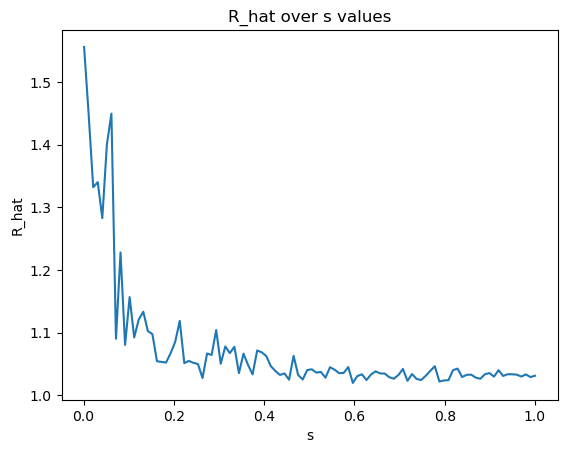

In [19]:
plt.plot(s_values, mean_R_hat_values)
plt.xlabel('s')
plt.ylabel('R_hat')
plt.title('R_hat over s values')
plt.show()